# Blinkit Exploratory Data Analysis
---

## Importing necessary libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from wordcloud import WordCloud

## Loading the CSV files

### 1. Customers

In [2]:
customers = pd.read_csv(
    '/kaggle/input/blinkit/Customers.csv', index_col='CustomerID',
    usecols=['CustomerID', 'Name', 'City', 'Operating System']).astype(
    {'Name': 'string', 'City': 'category', 'Operating System': 'category'})
customers.head(10)

,Name,City,Operating System
CustomerID,,,
1,Kavya Reddy,Delhi,Android
2,Siddharth Joshi,Bangalore,Android
3,Neha Joshi,Bangalore,Android
4,Siddharth Mehta,Pune,Android
5,Rajesh Reddy,Pune,Android
6,Amit Khan,Surat,Android
7,Siddharth Reddy,Chennai,Android
8,Ishani Pandey,Delhi,Android
9,Aarav Mehta,Delhi,Android


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1 to 300
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              300 non-null    string  
 1   City              300 non-null    category
 2   Operating System  300 non-null    category
dtypes: category(2), string(1)
memory usage: 5.8 KB


### 2. Orders

In [4]:
orders = pd.read_csv(
    '/kaggle/input/blinkit/Orders.csv', index_col='OrderID', skiprows=1,
    names=['OrderID','CustomerID', 'Order Time', 'Delivery Time', 'Amount', 'Delivery Status'],
    usecols=['OrderID','CustomerID', 'Order Time', 'Delivery Time', 'Delivery Status'],
    parse_dates=['Order Time', 'Delivery Time']).astype({'Delivery Status': 'category'})
orders.head(10)

,CustomerID,Order Time,Delivery Time,Delivery Status
OrderID,,,,
1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,Delivered
2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,Delivered
3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,Delivered
4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,Delivered
5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,Delivered
6,108,2024-10-24 16:57:56,2024-10-24 17:11:56,Delivered
7,85,2024-11-16 16:27:56,2024-11-16 16:42:56,Delivered
8,278,2024-10-03 10:55:56,2024-10-03 11:04:56,Delivered
9,43,2024-10-27 17:00:56,2024-10-27 17:12:56,Delivered


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 1 to 4000
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       4000 non-null   int64         
 1   Order Time       4000 non-null   datetime64[ns]
 2   Delivery Time    3924 non-null   datetime64[ns]
 3   Delivery Status  4000 non-null   category      
dtypes: category(1), datetime64[ns](2), int64(1)
memory usage: 129.0 KB


### 3. Order details

In [6]:
order_details = pd.read_csv(
    '/kaggle/input/blinkit/OrderDetails.csv', index_col='OrderDetailsID', skiprows=1,
    names=['OrderDetailsID', 'OrderID', 'Product Name', 'Quantity', 'Price']).astype(
    {'Product Name': 'category'})
order_details.head(10)

,OrderID,Product Name,Quantity,Price
OrderDetailsID,,,,
1,2262,Clinic Plus Shampoo,1,99
2,115,Maggi Noodles,5,120
3,3872,Harpic Toilet Cleaner,4,300
4,3489,Ariel Detergent,5,99
5,1717,Bournvita,3,99
6,375,Aashirvaad Atta,5,20
7,2722,Good Day Cookies,1,80
8,3330,Britannia Rusk,1,80
9,1164,Good Day Cookies,5,35


In [7]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OrderID       10000 non-null  int64   
 1   Product Name  10000 non-null  category
 2   Quantity      10000 non-null  int64   
 3   Price         10000 non-null  int64   
dtypes: category(1), int64(3)
memory usage: 323.0 KB


## Merging the DataFrames

In [8]:
df = order_details.merge(orders, on='OrderID').merge(customers, on='CustomerID')
df.head(10)

,OrderID,Product Name,Quantity,Price,CustomerID,Order Time,Delivery Time,Delivery Status,Name,City,Operating System
0,2262,Clinic Plus Shampoo,1,99,143,2024-10-15 11:38:56,2024-10-15 11:53:56,Delivered,Ananya Pandey,Pune,Android
1,115,Maggi Noodles,5,120,136,2024-09-27 19:13:56,2024-09-27 19:27:56,Delivered,Siddharth Mehta,Delhi,Android
2,3872,Harpic Toilet Cleaner,4,300,224,2024-11-07 10:01:56,2024-11-07 10:14:56,Delivered,Amit Singh,Delhi,Android
3,3489,Ariel Detergent,5,99,19,2024-10-09 20:04:56,2024-10-09 20:15:56,Delivered,Rajesh Khan,Hyderabad,Android
4,1717,Bournvita,3,99,226,2024-11-23 11:51:56,2024-11-23 12:06:56,Delivered,Ananya Joshi,Kolkata,Android
5,375,Aashirvaad Atta,5,20,177,2024-10-15 19:21:56,2024-10-15 19:33:56,Delivered,Pooja Mehta,Delhi,Android
6,2722,Good Day Cookies,1,80,76,2024-09-29 03:59:56,2024-09-29 04:12:56,Delivered,Neha Pandey,Delhi,Android
7,3330,Britannia Rusk,1,80,230,2024-11-08 11:55:56,2024-11-08 12:12:56,Delivered,Ananya Joshi,Pune,Android
8,1164,Good Day Cookies,5,35,197,2024-11-20 04:01:56,2024-11-20 04:18:56,Delivered,Ananya Singh,Kolkata,Android
9,179,Himalaya Face Wash,4,200,153,2024-10-15 01:23:56,2024-10-15 01:32:56,Delivered,Kavya Pandey,Bangalore,Android


In [9]:
df.index = order_details.index
df.index.name = 'OrderID'
df['Amount'] = df.Quantity * df.Price
df = df[['Name', 'City', 'Operating System', 'Product Name', 'Amount', 'Order Time', 'Delivery Time', 'Delivery Status']]
df.head(10)

,Name,City,Operating System,Product Name,Amount,Order Time,Delivery Time,Delivery Status
OrderID,,,,,,,,
1,Ananya Pandey,Pune,Android,Clinic Plus Shampoo,99,2024-10-15 11:38:56,2024-10-15 11:53:56,Delivered
2,Siddharth Mehta,Delhi,Android,Maggi Noodles,600,2024-09-27 19:13:56,2024-09-27 19:27:56,Delivered
3,Amit Singh,Delhi,Android,Harpic Toilet Cleaner,1200,2024-11-07 10:01:56,2024-11-07 10:14:56,Delivered
4,Rajesh Khan,Hyderabad,Android,Ariel Detergent,495,2024-10-09 20:04:56,2024-10-09 20:15:56,Delivered
5,Ananya Joshi,Kolkata,Android,Bournvita,297,2024-11-23 11:51:56,2024-11-23 12:06:56,Delivered
6,Pooja Mehta,Delhi,Android,Aashirvaad Atta,100,2024-10-15 19:21:56,2024-10-15 19:33:56,Delivered
7,Neha Pandey,Delhi,Android,Good Day Cookies,80,2024-09-29 03:59:56,2024-09-29 04:12:56,Delivered
8,Ananya Joshi,Pune,Android,Britannia Rusk,80,2024-11-08 11:55:56,2024-11-08 12:12:56,Delivered
9,Ananya Singh,Kolkata,Android,Good Day Cookies,175,2024-11-20 04:01:56,2024-11-20 04:18:56,Delivered


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              10000 non-null  string        
 1   City              10000 non-null  category      
 2   Operating System  10000 non-null  category      
 3   Product Name      10000 non-null  category      
 4   Amount            10000 non-null  int64         
 5   Order Time        10000 non-null  datetime64[ns]
 6   Delivery Time     9796 non-null   datetime64[ns]
 7   Delivery Status   10000 non-null  category      
dtypes: category(4), datetime64[ns](2), int64(1), string(1)
memory usage: 431.0 KB


## Order Analysis

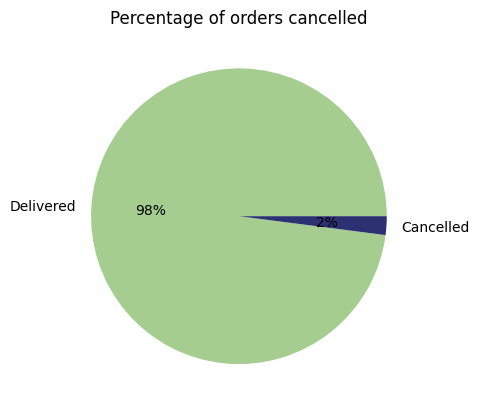

In [11]:
_ = (df['Delivery Status'].value_counts(normalize=True) * 100) \
.plot(kind='pie', title='Percentage of orders cancelled', label='', autopct='%1.0f%%', colormap='crest')

**Insight:** Majority of the orders are successfully delivered; while a few are canceled.

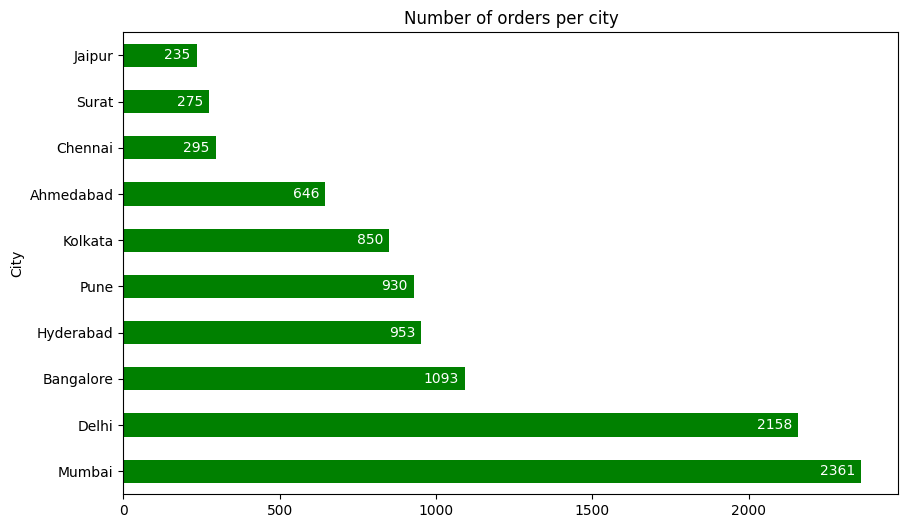

In [12]:
df = df.dropna()
cities = df.City.value_counts()
plt.figure(figsize=(10, 6))
cities.plot(kind='barh', title='Number of orders per city', color='green')
for i, val in enumerate(cities):
    plt.text(val-20, i, str(val), va='center', ha='right', color='white')

**Insight:** Mumbai is the highest performing city, while Jaipur is the least performing

## Customer Analysis

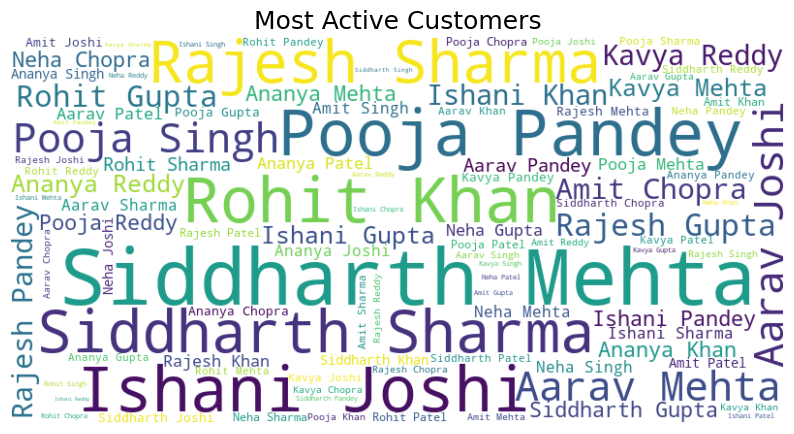

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white') \
            .generate_from_frequencies(df['Name'].value_counts())

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
_ = plt.title("Most Active Customers", fontsize=18)

**Insight:** Siddhart Mehta, Ishani Joshi, Pooja Pandey and others appear to be the most active customers

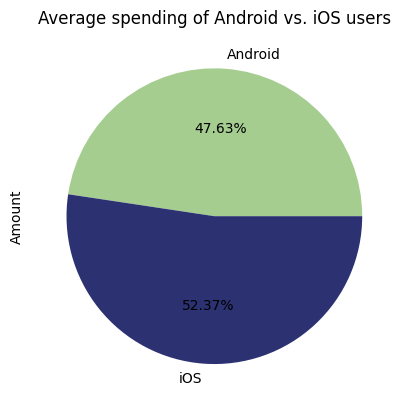

In [14]:
os_users = df.groupby('Operating System', observed=False)['Amount']
os_users = (os_users.sum() / os_users.count()).round(2)
_ = os_users.plot(kind='pie', title='Average spending of Android vs. iOS users', autopct='%1.2f%%', colormap='crest')

**Insight:** iOS users appear to be spending slightly higher than Android users

In [15]:
spending = df.groupby('Name').agg({
    'Amount': 'mean',  # Average spending
    'Order Time': 'count'  # Order count
}).rename(columns={'Amount': 'Average Spending', 'Order Time': 'Order Count'})
spending.sort_values('Average Spending', ascending=False).head(10)

,Average Spending,Order Count
Name,,
Amit Pandey,373.045455,22
Kavya Chopra,328.338235,68
Rajesh Joshi,326.471429,70
Aarav Patel,318.032520,123
Ishani Mehta,317.769231,52
Kavya Sharma,315.000000,24
Amit Sharma,313.123288,73
Pooja Sharma,312.887500,80
Ishani Khan,309.593548,155


Text(0.5, 1.0, 'Customer Segmentation')

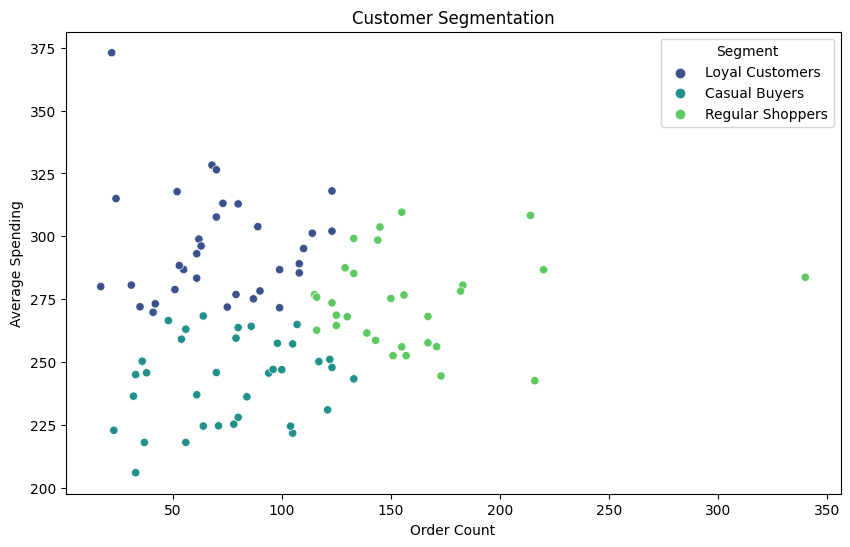

In [16]:
scaled_data = StandardScaler().fit_transform(spending)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
spending['Segment'] = kmeans.fit_predict(scaled_data)

spending['Segment'] = spending['Segment'].apply(
    lambda x: 'Loyal Customers' if x == 2 else 'Regular Shoppers' if x == 0 else 'Casual Buyers')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=spending, x='Order Count', y='Average Spending', hue='Segment', palette='viridis')
plt.title("Customer Segmentation")

**Insight:** Segmented customers into 3 categories: Loyal customers, Casual buyers and Regular shoppers

## Product Analysis 

Text(0.5, 1.0, 'Best-selling products')

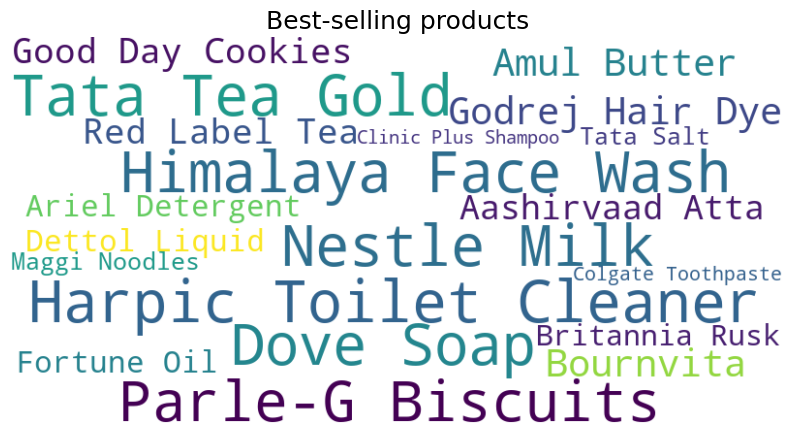

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud = wordcloud.generate_from_frequencies(df['Product Name'].value_counts())

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Best-selling products', fontsize=18)

**Insight:** Harpic Toilet Cleaner, Nestle Milk, Himalaya Face Wash and others appear to be the most active customers

In [18]:
popular = df.groupby(['City', 'Product Name'], observed=False).size().reset_index(name='Order Count')
popular = popular.sort_values(['City', 'Order Count'], ascending=[True, False])
popular = popular.groupby('City', observed=False).first().reset_index()
popular

,City,Product Name,Order Count
0,Ahmedabad,Parle-G Biscuits,45
1,Bangalore,Himalaya Face Wash,63
2,Chennai,Nestle Milk,24
3,Delhi,Tata Tea Gold,130
4,Hyderabad,Godrej Hair Dye,64
5,Jaipur,Colgate Toothpaste,17
6,Kolkata,Red Label Tea,51
7,Mumbai,Harpic Toilet Cleaner,145
8,Pune,Britannia Rusk,60
9,Surat,Amul Butter,20


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


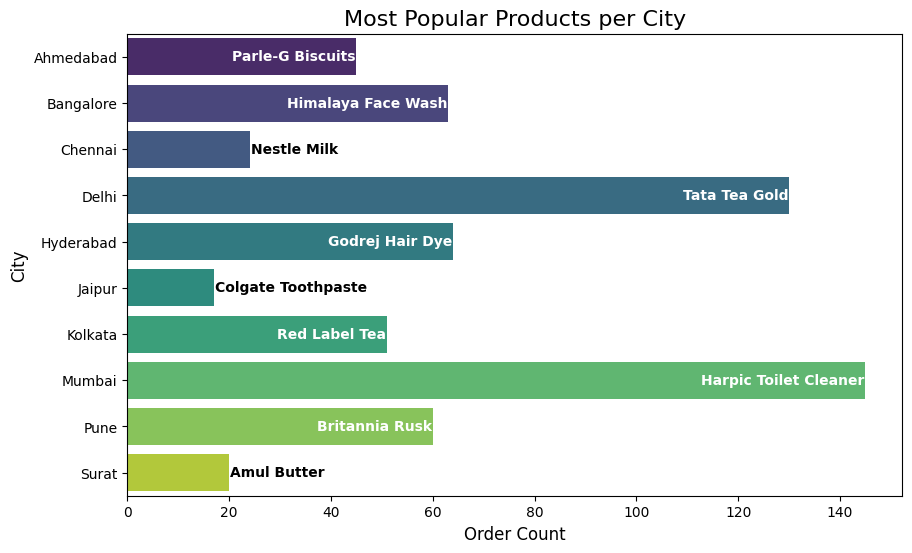

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=popular, x="Order Count", y="City", palette="viridis")

for i, (count, product) in enumerate(zip(popular["Order Count"], popular["Product Name"])):
    if count > 25:  # Place inside the bar if the bar is long enough
        plt.text(count - 0.2, i, product, ha='right', va='center',
                fontsize=10, color='white', weight='bold')
    else:  # Place outside the bar if the bar is too short
        plt.text(count + 0.2, i, product, ha='left', va='center',
                fontsize=10, color='black', weight='bold')

plt.title("Most Popular Products per City", fontsize=16)
plt.xlabel("Order Count", fontsize=12)
_ = plt.ylabel("City", fontsize=12)

**Insight:** Harpic Toilet Cleaner is most popular in Mumbai, while Tata Tea Gold is most popular in Delhi

# Time-based Analysis

In [20]:
daily = df[['Name', 'Product Name', 'Amount', 'Order Time']].copy()
daily['Order Hour'] = daily['Order Time'].dt.hour
daily['Order Hour'] = pd.cut(
    daily['Order Hour'], right = False, bins = [0, 3, 6, 9, 12, 15, 18, 21, 24],
    labels = ['00-03', '04-06', '07-09', '10-12', '13-15', '16-18', '19-21', '22-24'])
daily.head(10)

,Name,Product Name,Amount,Order Time,Order Hour
OrderID,,,,,
1,Ananya Pandey,Clinic Plus Shampoo,99,2024-10-15 11:38:56,10-12
2,Siddharth Mehta,Maggi Noodles,600,2024-09-27 19:13:56,19-21
3,Amit Singh,Harpic Toilet Cleaner,1200,2024-11-07 10:01:56,10-12
4,Rajesh Khan,Ariel Detergent,495,2024-10-09 20:04:56,19-21
5,Ananya Joshi,Bournvita,297,2024-11-23 11:51:56,10-12
6,Pooja Mehta,Aashirvaad Atta,100,2024-10-15 19:21:56,19-21
7,Neha Pandey,Good Day Cookies,80,2024-09-29 03:59:56,04-06
8,Ananya Joshi,Britannia Rusk,80,2024-11-08 11:55:56,10-12
9,Ananya Singh,Good Day Cookies,175,2024-11-20 04:01:56,04-06


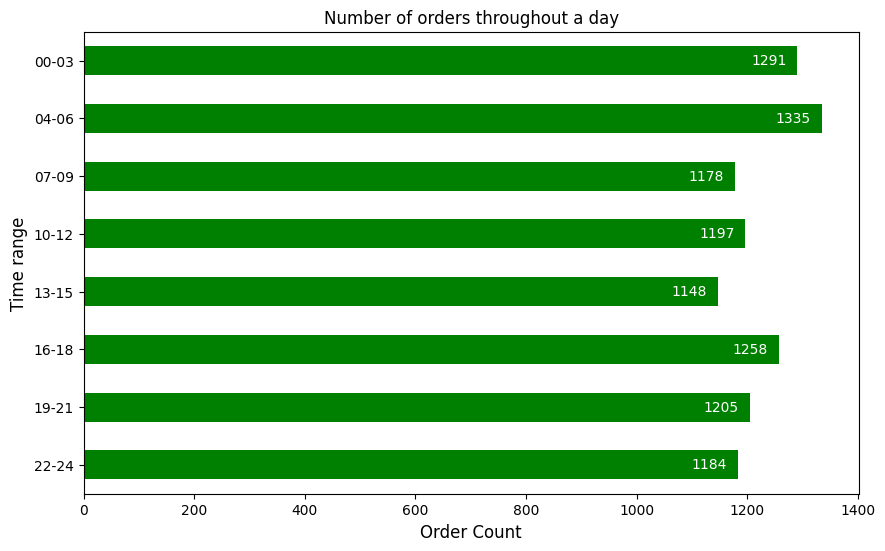

In [21]:
daily = daily.groupby('Order Hour', observed=False).size()[::-1]

plt.figure(figsize=(10, 6))
daily.plot(kind='barh', title='Number of orders throughout a day', color='green')
plt.xlabel('Order Count', fontsize=12)
plt.ylabel('Time range', fontsize=12)
for i, val in enumerate(daily):
    plt.text(val-20, i, str(val), va='center', ha='right', color='white')

**Insight:** There is no noticeable pattern found in order count throughout a day

In [22]:
weekly = df[['Name', 'Product Name', 'Amount', 'Order Time']].copy()
weekly['Day'] = weekly['Order Time'].dt.day_name()
weekly.head(10)

,Name,Product Name,Amount,Order Time,Day
OrderID,,,,,
1,Ananya Pandey,Clinic Plus Shampoo,99,2024-10-15 11:38:56,Tuesday
2,Siddharth Mehta,Maggi Noodles,600,2024-09-27 19:13:56,Friday
3,Amit Singh,Harpic Toilet Cleaner,1200,2024-11-07 10:01:56,Thursday
4,Rajesh Khan,Ariel Detergent,495,2024-10-09 20:04:56,Wednesday
5,Ananya Joshi,Bournvita,297,2024-11-23 11:51:56,Saturday
6,Pooja Mehta,Aashirvaad Atta,100,2024-10-15 19:21:56,Tuesday
7,Neha Pandey,Good Day Cookies,80,2024-09-29 03:59:56,Sunday
8,Ananya Joshi,Britannia Rusk,80,2024-11-08 11:55:56,Friday
9,Ananya Singh,Good Day Cookies,175,2024-11-20 04:01:56,Wednesday


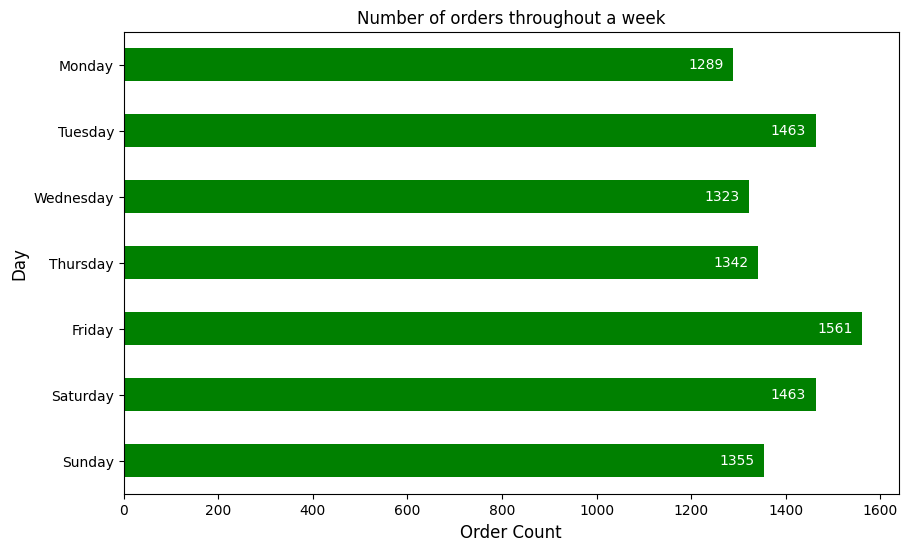

In [23]:
weekly['Day'] = pd.Categorical(
    weekly['Day'], ordered = True,
    categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekly = weekly.groupby('Day', observed=False).size()[::-1]

plt.figure(figsize=(10, 6))
weekly.plot(kind='barh', title='Number of orders throughout a week', color='green')
plt.xlabel('Order Count', fontsize=12)
plt.ylabel('Day', fontsize=12)
for i, val in enumerate(weekly):
    plt.text(val-20, i, str(val), va='center', ha='right', color='white')

**Insight:** There is no noticeable pattern found in order count throughout a week